# Linear Regression using TensorFlow

## Import the necessary libraries

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

## Fetch the data (here california housing dataset is used)

In [2]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## Data Preprocessing

### Splitting the full data into train and test

In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train_full, X_test, y_train_full, y_test

(array([[   4.6053    ,   30.        ,    4.46795435, ...,    1.69885865,
           37.76      , -122.44      ],
        [   3.3906    ,   33.        ,    5.69555035, ...,    2.68618267,
           32.78      , -116.95      ],
        [   5.2806    ,   47.        ,    4.48533333, ...,    2.232     ,
           37.78      , -122.46      ],
        ...,
        [   3.2663    ,   19.        ,    3.604913  , ...,    1.86284545,
           34.04      , -118.46      ],
        [   7.1572    ,   25.        ,    7.70588235, ...,    3.07969639,
           33.76      , -118.04      ],
        [   3.0965    ,   16.        ,    3.32477169, ...,    1.93493151,
           34.02      , -118.41      ]]),
 array([[   1.7054    ,   39.        ,    3.90082645, ...,    3.38347107,
           37.63      , -120.97      ],
        [   2.6442    ,   34.        ,    6.18592965, ...,    4.22613065,
           34.01      , -117.41      ],
        [   2.3382    ,   19.        ,    4.05989111, ...,    2.60980036,

### Splitting the training data 

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
X_train, X_valid, y_train, y_valid

(array([[   4.9375    ,   19.        ,    4.61764706, ...,    2.34375   ,
           33.87      , -118.36      ],
        [   6.2045    ,   29.        ,    5.95192308, ...,    2.92548077,
           37.31      , -122.04      ],
        [   6.1943    ,   13.        ,    6.53246753, ...,    3.46753247,
           38.68      , -121.25      ],
        ...,
        [   3.1429    ,   32.        ,    5.98951049, ...,    3.11538462,
           33.11      , -117.09      ],
        [   3.625     ,   20.        ,    3.56113903, ...,    1.86264657,
           37.57      , -122.33      ],
        [   3.5917    ,   22.        ,    5.41052632, ...,    2.88070175,
           39.21      , -123.19      ]]),
 array([[   2.375     ,   11.        ,    5.96511628, ...,    2.37209302,
           39.78      , -120.48      ],
        [   3.9479    ,   35.        ,    5.36286201, ...,    3.59454855,
           33.78      , -117.97      ],
        [   2.4387    ,   34.        ,    2.74399038, ...,    3.64423077,

## Dimensionality Reduction using transform and fit transform

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.55699857, -0.77113174, -0.33874061, ..., -0.05915181,
        -0.81896681,  0.59911607],
       [ 1.22012201,  0.02706727,  0.21292832, ..., -0.01652659,
         0.78841092, -1.23817849],
       [ 1.21478353, -1.25005115,  0.45295987, ...,  0.02319122,
         1.42855845, -0.84375928],
       ...,
       [-0.38226056,  0.26652697,  0.22846919, ..., -0.00261174,
        -1.17408515,  1.2331824 ],
       [-0.12993869, -0.69131184, -0.77556376, ..., -0.09440375,
         0.90989878, -1.38296529],
       [-0.14736727, -0.53167204, -0.01091724, ..., -0.01980769,
         1.67620677, -1.81233304]])

In [6]:
X_valid = scaler.transform(X_valid)
X_valid

array([[-0.78416465, -1.40969095,  0.21838318, ..., -0.05707503,
         1.94254552, -0.45932536],
       [ 0.03906096,  0.50598667, -0.0306245 , ...,  0.03249809,
        -0.8610203 ,  0.79382936],
       [-0.7508253 ,  0.42616677, -1.11342152, ...,  0.03613846,
        -0.76756811,  0.66901315],
       ...,
       [ 0.74955036,  0.58580657,  0.17508295, ..., -0.02105812,
        -0.77691333,  0.77385876],
       [ 1.76328658,  1.86292498,  1.0080425 , ...,  0.19959384,
        -0.80962159,  0.69397639],
       [-0.4922752 ,  1.06472598, -0.29350564, ..., -0.05655229,
        -0.67411591,  0.58413813]])

In [7]:
X_test = scaler.transform(X_test)
X_test

array([[-1.13462042,  0.82526627, -0.63511681, ...,  0.01703178,
         0.93793443, -0.70396513],
       [-0.64327055,  0.42616677,  0.30968053, ...,  0.07877607,
        -0.75355028,  1.07341766],
       [-0.80342507, -0.77113174, -0.56935003, ..., -0.03965747,
         1.09680316, -1.38795794],
       ...,
       [ 0.20000055,  1.70328518,  0.38387787, ..., -0.04150285,
        -0.74887767,  0.61908667],
       [ 0.81392619, -1.96843025, -0.15285761, ..., -0.09480702,
        -0.92176423,  0.84874849],
       [-0.35425969,  0.02706727, -0.6032498 , ...,  0.1921552 ,
        -0.87971074,  0.83876319]])

# Training

### Selecting the model for neural network with the activation function 

In [9]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")

### Training the model 

In [10]:
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 1.3878 - val_loss: 0.5445
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.5569 - val_loss: 0.4794
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.4879 - val_loss: 0.4456
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.4701 - val_loss: 0.4403
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4488 - val_loss: 0.4208
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.4372 - val_loss: 0.4117
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.4382 - val_loss: 0.4018
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.4230 - val_loss: 0.3955
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.4100 - val_loss: 0.3954
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.4232 - val_loss: 0.3888
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 0.4228 - val_loss: 0.3866
Epoch 12/20
363/363 ━━━━━━━━━━

## Evaluation

### Mean Square Error test

In [11]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 0.3805


0.39877045154571533

### Testing for new instances

In [12]:
X_new = X_test[:3] # pretend these are new instances
X_new

array([[-1.13462042,  0.82526627, -0.63511681, -0.19139976,  0.5645559 ,
         0.01703178,  0.93793443, -0.70396513],
       [-0.64327055,  0.42616677,  0.30968053, -0.0231091 , -0.52968304,
         0.07877607, -0.75355028,  1.07341766],
       [-0.80342507, -0.77113174, -0.56935003, -0.09031679,  0.01199245,
        -0.03965747,  1.09680316, -1.38795794]])

### Predicting for new instances

In [13]:
y_pred = model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.8186285 ],
       [0.82131505],
       [1.6618688 ]], dtype=float32)

## Finding the loss

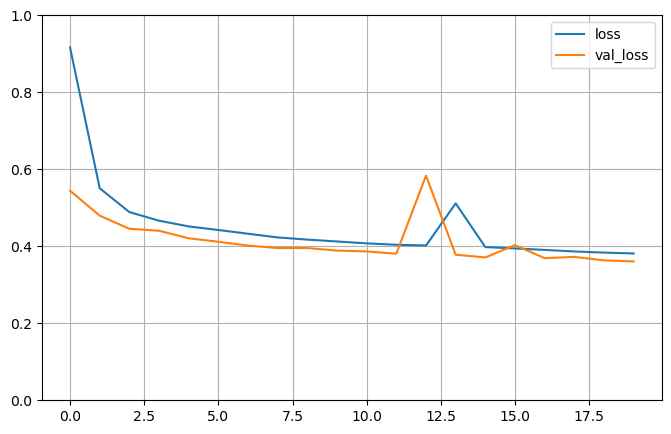

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()